In [ ]:
# Random Forest
## por: Luis Carlos Rincón y Jeison Polanco

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Se carga el conjunto de datos spam.data 
## sep== separacion por comas
## Header== no tiene
df=pd.read_csv('csv_Analisis_data_tesis_2.1.csv', sep=',', header=None)

In [ ]:
# ponemos un head para ver los primeros 5 casos
df.head()

,0,1,2,3,4,5,6,7,8,9
0,12.8,565.7,93,2,0.75,0.50,18.0,11.7,24,0
1,18.2,564.8,57,7,0.60,0.60,18.0,9.5,6,0
2,12.0,565.9,91,1,0.75,0.75,12.0,10.6,6,1
3,12.0,565.7,88,3,0.75,0.25,20.0,10.1,24,0
4,12.5,565.3,85,4,1.00,0.40,18.0,10.0,24,1


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

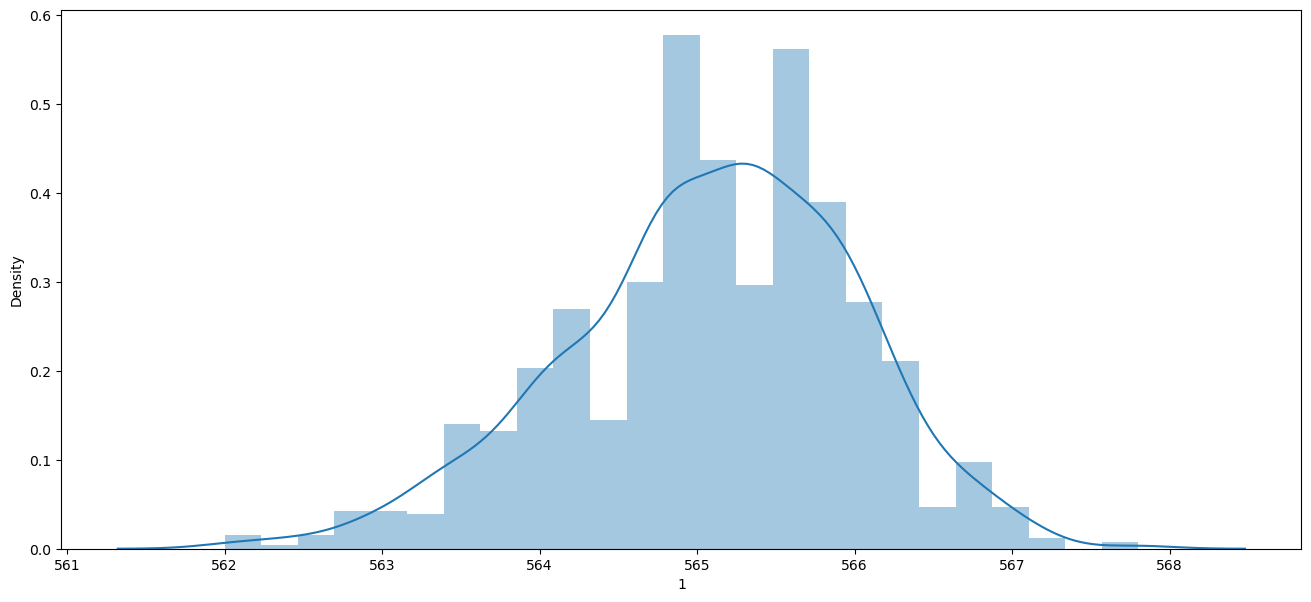

In [ ]:
# como se distribuye una columna a lo largo del conjunto de datos
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(df.iloc[:,1])

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

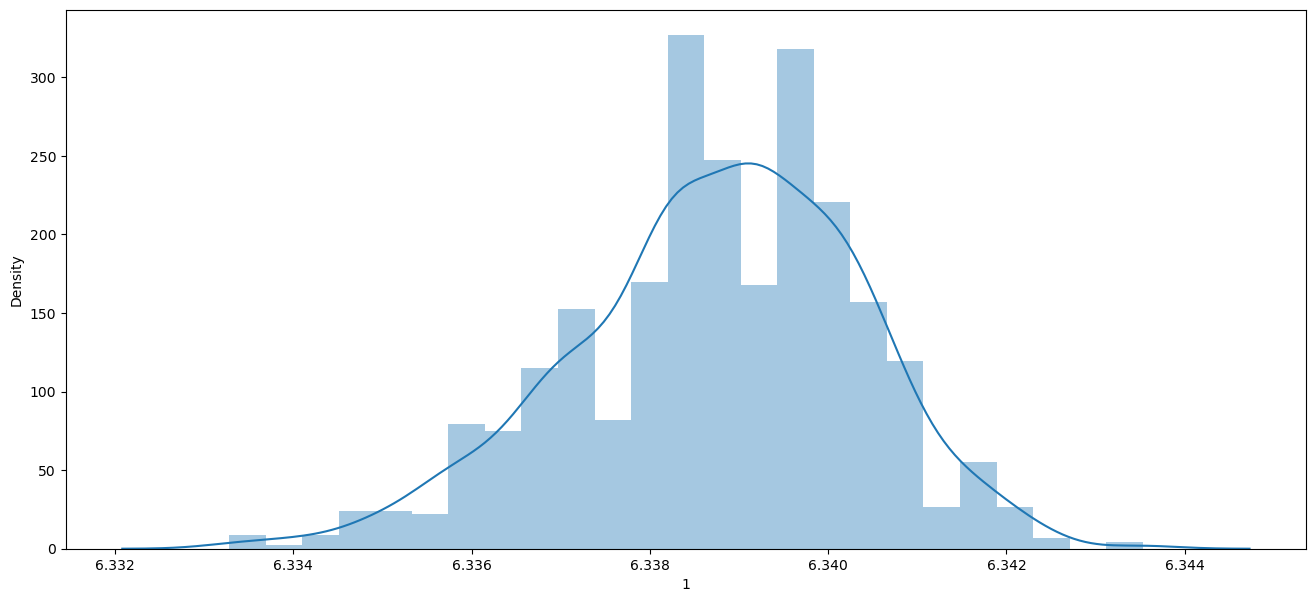

In [ ]:
# Grafica con datos normalizados
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(np.log1p(df.iloc[:,1]))

In [ ]:
# separa los datos en "X" y en "Y"
# "X" representa todas las columnas menos la ultima la cual es la de respuesta
# "Y" representa la columna de respuesta

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]


In [ ]:
X

,0,1,2,3,4,5,6,7,8
0,12.8,565.7,93,2,0.75,0.50,18.0,11.7,24
1,18.2,564.8,57,7,0.60,0.60,18.0,9.5,6
2,12.0,565.9,91,1,0.75,0.75,12.0,10.6,6
3,12.0,565.7,88,3,0.75,0.25,20.0,10.1,24
4,12.5,565.3,85,4,1.00,0.40,18.0,10.0,24
...,...,...,...,...,...,...,...,...,...
1100,18.7,563.7,62,6,0.95,0.50,12.0,11.3,3
1101,17.2,565.3,65,5,1.00,0.40,15.0,10.5,6
1102,16.6,566.3,75,3,1.00,0.50,10.0,12.2,3
1103,12.8,565.3,89,1,1.00,0.50,6.0,11.0,24


In [ ]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: 9, dtype: int64

In [ ]:
# Normalizamos los datos con logaritmos neperianos
x_normalizada=np.log1p(df.iloc[:,:-1])

In [ ]:
x_normalizada

,0,1,2,3,4,5,6,7,8
0,2.624669,6.339830,4.543295,1.098612,0.559616,0.405465,2.944439,2.541602,3.218876
1,2.954910,6.338241,4.060443,2.079442,0.470004,0.470004,2.944439,2.351375,1.945910
2,2.564949,6.340183,4.521789,0.693147,0.559616,0.559616,2.564949,2.451005,1.945910
3,2.564949,6.339830,4.488636,1.386294,0.559616,0.223144,3.044522,2.406945,3.218876
4,2.602690,6.339124,4.454347,1.609438,0.693147,0.336472,2.944439,2.397895,3.218876
...,...,...,...,...,...,...,...,...,...
1100,2.980619,6.336295,4.143135,1.945910,0.667829,0.405465,2.564949,2.509599,1.386294
1101,2.901422,6.339124,4.189655,1.791759,0.693147,0.336472,2.772589,2.442347,1.945910
1102,2.867899,6.340888,4.330733,1.386294,0.693147,0.405465,2.397895,2.580217,1.386294
1103,2.624669,6.339124,4.499810,0.693147,0.693147,0.405465,1.945910,2.484907,3.218876


In [ ]:
# se puede observar ahora el porcentaje de ceros y unos en el conjunto de datos
ceros=Y[Y==0].count()
unos=Y[Y==1].count()

In [ ]:
ceros,unos

(421, 684)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='9', ylabel='Density'>

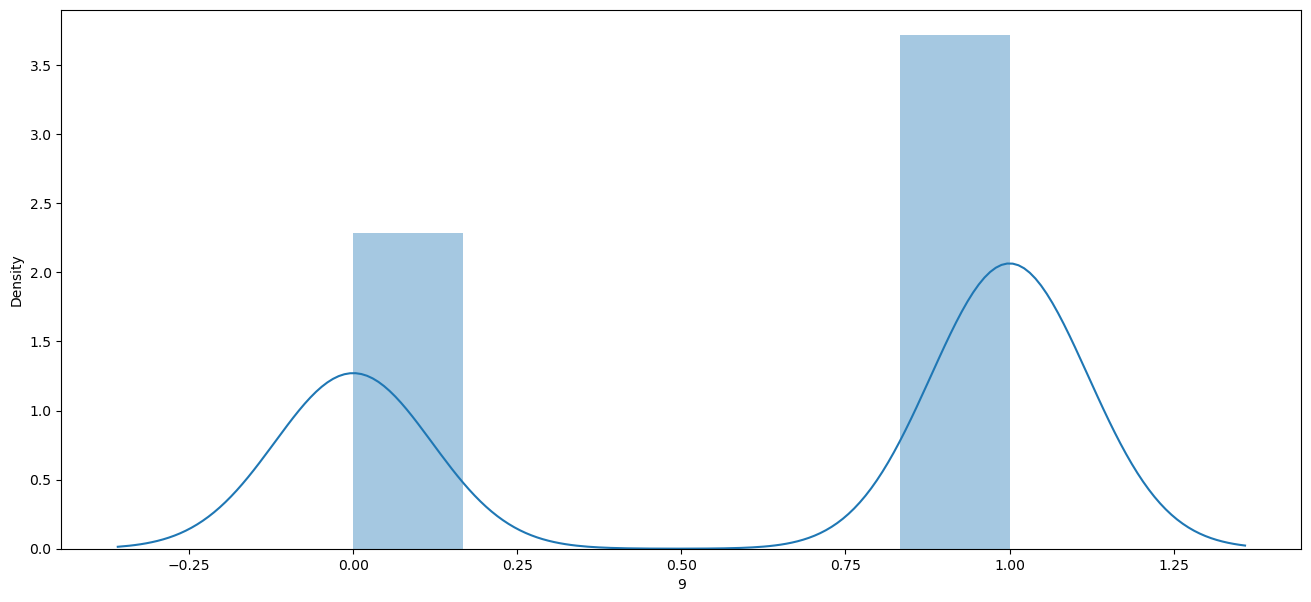

In [ ]:
# existen conjuntos de datos desvalanceados donde existen o muy pocos ceros o muy pocos unos con relación al otro valor
# en este caso se encuentran mas o menos balanceados pero existen tecnicas para balancear los datos
#(histograma)
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(Y)

In [ ]:
# Separar conjunto de entrenamiento y de validacion
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [ ]:
X_train.head

<bound method NDFrame.head of          0      1   2  3     4     5     6     7   8
677   12.8  564.5  91  3  1.00  0.50  16.0  11.3  24
385   11.3  565.2  90  2  0.00  0.25   2.1   9.7  24
195   12.3  564.8  93  2  1.00  0.40  12.0  11.2   6
1038  12.6  565.2  88  1  1.00  0.10   9.0  10.6  24
267   12.1  563.4  97  1  0.95  0.40  10.0  11.6   6
...    ...    ...  .. ..   ...   ...   ...   ...  ..
715   11.5  563.8  96  1  1.00  0.50   8.0  10.9   3
905   14.6  564.3  90  3  1.00  0.60   5.0  13.0   3
1096  10.6  566.0  97  2  0.95  0.25   7.0  10.1  24
235   12.1  565.3  93  2  0.95  0.40   6.0  11.0  24
1061  11.7  565.2  97  0  0.60  0.10   8.0  11.2  24

[884 rows x 9 columns]>

In [ ]:
# se empiezan a construir los clasificadores con arboles de decisión 

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# aqui se puede modificar
model = DecisionTreeClassifier(random_state=1)

In [ ]:
# ENTRENAMIENTO DEL MODELO,
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
Y_prds = model.predict(X_test)

In [ ]:
# se crea un dataframe para comparar con lso valores reales
comp = pd.DataFrame({'real': Y_test,'predicciones': Y_prds})

In [ ]:
comp.head(10)

,real,predicciones
762,1,1
1037,0,1
126,1,1
763,0,0
873,1,0
414,1,0
830,1,1
133,0,1
298,0,1
478,1,1


In [ ]:
# Evaluar el nivel de prediccion del modelo

from sklearn.metrics import accuracy_score

In [ ]:
# porcentaje de aciertos
acc = accuracy_score(Y_test, Y_prds)

In [ ]:
acc

0.5475113122171946

In [ ]:
# representacion de los resultados por medio de una matriz de confusión
from sklearn.metrics import confusion_matrix

In [ ]:
cm= confusion_matrix(Y_test, Y_prds)

In [ ]:
cm

array([[33, 45],
       [55, 88]], dtype=int64)

# Repeticion del modelo de arbol con datos normalizados

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_normalizada,Y, test_size=0.2, random_state=1)

In [ ]:
X_train.head

<bound method NDFrame.head of              0         1         2         3         4         5         6  \
677   2.624669  6.337710  4.521789  1.386294  0.693147  0.405465  2.833213   
385   2.509599  6.338947  4.510860  1.098612  0.000000  0.223144  1.131402   
195   2.587764  6.338241  4.543295  1.098612  0.693147  0.336472  2.564949   
1038  2.610070  6.338947  4.488636  0.693147  0.693147  0.095310  2.302585   
267   2.572612  6.335763  4.584967  0.693147  0.667829  0.336472  2.397895   
...        ...       ...       ...       ...       ...       ...       ...   
715   2.525729  6.336472  4.574711  0.693147  0.693147  0.405465  2.197225   
905   2.747271  6.337357  4.510860  1.386294  0.693147  0.470004  1.791759   
1096  2.451005  6.340359  4.584967  1.098612  0.667829  0.223144  2.079442   
235   2.572612  6.339124  4.543295  1.098612  0.667829  0.336472  1.945910   
1061  2.541602  6.338947  4.584967  0.000000  0.470004  0.095310  2.197225   

             7         8  
677   

In [ ]:
# se empiezan a construir los clasificadores con arboles de decisión 

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# aqui se puede modificar
model = DecisionTreeClassifier(random_state=1)

In [ ]:
# ENTRENAMIENTO DEL MODELO
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
Y_prds = model.predict(X_test)

In [ ]:
# se crea un dataframe para comparar con lso valores reales
comp = pd.DataFrame({'real': Y_test,'predicciones': Y_prds})

In [ ]:
comp.head(10)

,real,predicciones
762,1,1
1037,0,1
126,1,1
763,0,0
873,1,0
414,1,0
830,1,1
133,0,1
298,0,1
478,1,1


In [ ]:
# Evaluar el nivel de prediccion del modelo

from sklearn.metrics import accuracy_score

In [ ]:
# porcentaje de aciertos conn datos normalizados
acc = accuracy_score(Y_test, Y_prds)

In [ ]:
acc

0.5610859728506787

In [ ]:
# representacion de los resultados por medio de una matriz de confusión
from sklearn.metrics import confusion_matrix

In [ ]:
cm= confusion_matrix(Y_test, Y_prds)

In [ ]:
cm

array([[35, 43],
       [54, 89]], dtype=int64)

# Random forest

In [ ]:
# Utilizaremos random forest

from sklearn.ensemble import RandomForestClassifier

In [187]:
rf= RandomForestClassifier(n_estimators=1000,criterion='mse',
                           max_depth=1000,min_samples_split=3,
                           min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                           max_features='sqrt',max_leaf_nodes=10,
                           min_impurity_decrease=0.0,
                           bootstrap=True,oob_score=False,
                           n_jobs=-1,random_state=1,
                           verbose=0,warm_start=False,
                           ccp_alpha=0.0,max_samples=10)

In [188]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=1000, max_features='sqrt', max_leaf_nodes=10,
                       max_samples=10, min_samples_split=3, n_estimators=1000,
                       n_jobs=-1, random_state=1)

In [189]:
Y_prdss = rf.predict(X_test)

In [190]:
Y_prdss

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0], dtype=int64)

In [191]:
#Indice de ocurrencia
accuracy_score(Y_test, Y_prdss)

0.7058823529411765